# Summer Training Project :- CAB CANCELLATION

Made By : Gursimar Singh Kohli

Branch : CSE-AIML

Roll No : 030  

# Introduction
YourCabs is a leading cab service provider
company based in Bangalore,catering city's fast paced and dynamic transportation needs.

With a fleet of over 1000 vehicles,Your cabs offer a range of services including point-to-point rides,long-distance travel,and hourly rentals

The company has built its reputation on providing timely,safe,and comfortable rides to its customers


# Business Problem : Frequent Booking Cancellations Due To Car Unavailability

# Challenge:
YourCabs faces a recurrring issue of booking cancellations due to unavailability of cars,particularly during peak hours or in less accessible areas.

# Impact on the Business:
Frequent Cancellations can lead to a direct loss of revenue and increase in customer churn.In long-term it could lead to a decline in market share

# Objective of the Project :
The aim of this ML project is to develop a predictive model that can
anticipate booking cancellations in advance. So that YourCabs can take proactive measures to resolve the issue.

# Problem Statement :
Booking cancellations occur close to the trip start time,causing inconvenience to passengers.

Develop a predictive model to classify new bookings are likely to be cancelled or not

# Workflow:
1.Data Collection
2.Data Preprocessing
3.EDA
4.Train Test Split
5.Apply ML Models
6.Evaluation Metrics
7.Model Saving

# Importing Important Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
cab_df = pd.read_csv('/content/YourCabs.csv')

In [ ]:
cab_df.head()

,id,user_id,vehicle_model_id,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,2,NaN,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,2,NaN,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,2,NaN,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,2,NaN,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,2,NaN,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0


In [ ]:
cab_df.shape

(43431, 18)

In [ ]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   travel_type_id       43431 non-null  int64  
 4   package_id           7550 non-null   float64
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  online_booking       43431 non-null  int64  
 11  mobile_site_booking  43431 non-null  int64  
 12  booking_created      43431 non-null  object 
 13  from_lat             43338 non-null  float64
 14  from_long            43338 non-null  float64
 15  to_lat               34293 non-null 

In [ ]:
cab_df.describe()

,id,user_id,vehicle_model_id,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation
count,43431.000000,43431.000000,43431.00000,43431.000000,7550.000000,43343.000000,34293.000000,16345.000000,1588.000000,43431.000000,43431.000000,43338.000000,43338.000000,34293.000000,34293.000000,43431.000000
mean,159206.473556,30739.198153,25.71723,2.137252,2.030066,714.544494,669.490917,14.915081,68.537783,0.351592,0.043241,12.982461,77.636255,13.026648,77.640595,0.072114
std,15442.386279,10996.476709,26.79825,0.437712,1.461756,419.883553,400.638225,1.165306,49.880732,0.477473,0.203402,0.085933,0.059391,0.113487,0.064045,0.258680
min,132512.000000,16.000000,1.00000,1.000000,1.000000,2.000000,2.000000,1.000000,4.000000,0.000000,0.000000,12.776630,77.386930,12.776630,77.386930,0.000000
25%,145778.000000,24614.000000,12.00000,2.000000,1.000000,393.000000,393.000000,15.000000,32.000000,0.000000,0.000000,12.926450,77.593661,12.951850,77.582030,0.000000
50%,159248.000000,31627.000000,12.00000,2.000000,2.000000,590.000000,541.000000,15.000000,49.000000,0.000000,0.000000,12.968887,77.635750,12.982750,77.645030,0.000000
75%,172578.500000,39167.000000,24.00000,2.000000,2.000000,1089.000000,1054.000000,15.000000,108.000000,1.000000,0.000000,13.007750,77.688900,13.199560,77.706880,0.000000
max,185941.000000,48730.000000,91.00000,3.000000,7.000000,1403.000000,1403.000000,31.000000,203.000000,1.000000,1.000000,13.366072,77.786420,13.366072,77.786420,1.000000


In [ ]:
cab_df.isnull().sum()

,0
id,0
user_id,0
vehicle_model_id,0
travel_type_id,0
package_id,35881
from_area_id,88
to_area_id,9138
from_city_id,27086
to_city_id,41843
from_date,0


In [ ]:
cab_df.dtypes

,0
id,int64
user_id,int64
vehicle_model_id,int64
travel_type_id,int64
package_id,float64
from_area_id,float64
to_area_id,float64
from_city_id,float64
to_city_id,float64
from_date,object


In [ ]:
cab_df.isnull().sum()/len(cab_df)*100

,0
id,0.000000
user_id,0.000000
vehicle_model_id,0.000000
travel_type_id,0.000000
package_id,82.616104
from_area_id,0.202620
to_area_id,21.040271
from_city_id,62.365591
to_city_id,96.343626
from_date,0.000000


# Data Cleaning


In [ ]:
cab_df = cab_df.drop(['id','user_id','package_id','to_area_id','from_city_id','to_city_id'],axis=1)

In [ ]:
cab_df.shape

(43431, 12)

In [ ]:
# Divided the data into dependent and independent features
data = cab_df.drop(['Car_Cancellation'],axis=1)
target = cab_df['Car_Cancellation']

In [ ]:
data.shape

(43431, 11)

In [ ]:
data['vehicle_model_id'].value_counts()/len(data)*100

,count
vehicle_model_id,
12,73.355437
85,5.542124
89,5.505284
65,4.402385
28,3.918860
24,3.439939
87,1.300914
90,0.718381
23,0.683843


So we can see vehicle 12 is covering 73% of the entire values of the column

In [ ]:
data = data.drop(['vehicle_model_id'],axis=1)
# Dropping as single value has more percentage

In [ ]:
data.head()

,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long
0,2,83.0,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750
1,2,1010.0,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640
2,2,1301.0,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766
3,2,768.0,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140
4,2,1365.0,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720


In [ ]:
data['from_area_id'].unique()

array([  83., 1010., 1301.,  768., 1365., 1021.,  571., 1192.,  448.,
        516.,  150.,  455., 1166.,  793., 1063., 1102.,  814., 1383.,
       1353.,  297.,  471.,   58.,  540., 1286.,  515.,  142.,  393.,
         89., 1237.,   61.,  137.,  409., 1062., 1371., 1323., 1017.,
        168., 1373.,  373.,  413.,  974., 1374.,  271., 1136., 1033.,
        145., 1384.,  105.,  112., 1037., 1040.,  949., 1330.,   87.,
       1032.,  217.,  344.,  590., 1086., 1053., 1223.,  963., 1041.,
        585., 1322.,  293.,  339., 1194.,  353., 1068.,    6.,  601.,
        479., 1084.,  776., 1186.,  253., 1378., 1054.,  466.,  458.,
        149.,  167.,  352.,  625.,  849.,  392., 1095.,  463., 1244.,
        691.,  484.,  692.,  156., 1083., 1096.,  572.,  767.,  136.,
       1155.,  410.,  157.,  689.,  824.,  450., 1085., 1388., 1199.,
        197.,  151.,   25.,  541., 1183., 1391., 1015., 1153.,  238.,
       1058., 1118.,  667., 1191., 1230.,  912., 1214.,  376.,  499.,
        559.,  542.,

In [ ]:
print(data[data['from_lat'] == data['from_lat'].median()]['from_area_id'].max())
print(data['from_lat'].median())
print(data['from_long'].median())

1044.0
12.968887
77.63575


In [ ]:
data[data['from_lat'] == data['from_lat'].median()]['from_area_id']

,from_area_id
276,1044.0
277,1044.0
1517,1044.0
1668,1044.0
3057,1044.0
3628,1044.0
3826,1044.0
4255,1044.0
4365,1044.0
4619,1044.0


In [ ]:
data[data['from_lat'] == data['from_lat'].median()].shape

(42, 10)

# Fill Missing Values

In [ ]:
# Filling missing values
data['from_lat'].fillna(data['from_lat'].median(),inplace=True)
data['from_long'].fillna(data['from_long'].median(),inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   travel_type_id       43431 non-null  int64  
 1   from_area_id         43343 non-null  float64
 2   from_date            43431 non-null  object 
 3   online_booking       43431 non-null  int64  
 4   mobile_site_booking  43431 non-null  int64  
 5   booking_created      43431 non-null  object 
 6   from_lat             43431 non-null  float64
 7   from_long            43431 non-null  float64
 8   to_lat               34293 non-null  float64
 9   to_long              34293 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 3.3+ MB


In [ ]:
data['from_area_id'].fillna(data[data['from_lat'] == data['from_lat'].median()]['from_area_id'].max(),inplace=True)

In [ ]:
data['to_lat'].fillna(cab_df.groupby('from_area_id')['to_lat'].transform('median')
,inplace=True)
#Fill null with median for Continuous data and mode for Discrete data
#filling na values of to_lat with median of each group where the group is formed based on from_area_id

In [ ]:
data['to_long'].fillna(cab_df.groupby('from_area_id')['to_long'].transform('median')
,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   travel_type_id       43431 non-null  int64  
 1   from_area_id         43431 non-null  float64
 2   from_date            43431 non-null  object 
 3   online_booking       43431 non-null  int64  
 4   mobile_site_booking  43431 non-null  int64  
 5   booking_created      43431 non-null  object 
 6   from_lat             43431 non-null  float64
 7   from_long            43431 non-null  float64
 8   to_lat               43326 non-null  float64
 9   to_long              43326 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 3.3+ MB


In [ ]:
data[data['to_lat'].isnull()].head()

,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long
2158,1,483.0,1/25/2013 6:00,1,0,1/24/2013 15:32,12.953020,77.56333,NaN,NaN
3945,1,1397.0,02-10-2013 16:30,1,0,02-10-2013 13:26,12.968887,77.63575,NaN,NaN
4912,1,1397.0,2/23/2013 6:30,1,0,2/19/2013 21:29,12.968887,77.63575,NaN,NaN
5144,1,1397.0,2/22/2013 13:30,1,0,2/22/2013 10:22,12.968887,77.63575,NaN,NaN
5970,1,1397.0,03-04-2013 07:00,0,0,03-02-2013 17:48,12.968887,77.63575,NaN,NaN


In [ ]:
data[data['to_lat'].isnull()]['from_area_id'].value_counts()

,count
from_area_id,
1397.0,90
1396.0,3
17.0,2
173.0,2
1215.0,1
483.0,1
1265.0,1
215.0,1
802.0,1


In [ ]:
data['to_lat'].fillna(data['to_lat'].median(),inplace=True)
data['to_long'].fillna(data['to_long'].median(),inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   travel_type_id       43431 non-null  int64  
 1   from_area_id         43431 non-null  float64
 2   from_date            43431 non-null  object 
 3   online_booking       43431 non-null  int64  
 4   mobile_site_booking  43431 non-null  int64  
 5   booking_created      43431 non-null  object 
 6   from_lat             43431 non-null  float64
 7   from_long            43431 non-null  float64
 8   to_lat               43431 non-null  float64
 9   to_long              43431 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 3.3+ MB


# Encoding

In [ ]:
traveltype = pd.get_dummies(data['travel_type_id'],drop_first=True)

In [ ]:
data = pd.concat([data,traveltype],axis=1)
data = data.drop(['travel_type_id'],axis=1)

In [ ]:
data.rename(columns={2:'traveltype_pointtopoint',3:'traveltype_hourly'},inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   from_area_id             43431 non-null  float64
 1   from_date                43431 non-null  object 
 2   online_booking           43431 non-null  int64  
 3   mobile_site_booking      43431 non-null  int64  
 4   booking_created          43431 non-null  object 
 5   from_lat                 43431 non-null  float64
 6   from_long                43431 non-null  float64
 7   to_lat                   43431 non-null  float64
 8   to_long                  43431 non-null  float64
 9   traveltype_pointtopoint  43431 non-null  bool   
 10  traveltype_hourly        43431 non-null  bool   
dtypes: bool(2), float64(5), int64(2), object(2)
memory usage: 3.1+ MB


In [ ]:
from geopy import distance
def cal_distance(from_lat,from_long,to_lat,to_long):
  return distance.distance((from_lat,from_long),(to_lat,to_long)).km

In [ ]:
data['distance'] = data.apply(lambda row: cal_distance(row['from_lat'],row['from_long'],row['to_lat'],row['to_long']),axis=1)

In [ ]:
data = data.drop(['from_lat','from_long','to_lat','to_long'],axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   from_area_id             43431 non-null  float64
 1   from_date                43431 non-null  object 
 2   online_booking           43431 non-null  int64  
 3   mobile_site_booking      43431 non-null  int64  
 4   booking_created          43431 non-null  object 
 5   traveltype_pointtopoint  43431 non-null  bool   
 6   traveltype_hourly        43431 non-null  bool   
 7   distance                 43431 non-null  float64
dtypes: bool(2), float64(2), int64(2), object(2)
memory usage: 2.1+ MB


In [ ]:
import datetime

# Extracting date and time

In [ ]:
data['from_date_dt'] = pd.to_datetime(data['from_date'], errors='coerce', dayfirst=True).dt.strftime('%m/%d/%Y')
data['from_time_tm'] = pd.to_datetime(data['from_date'], errors='coerce', dayfirst=True).dt.strftime('%H:%M')
data['booking_created_dt'] = pd.to_datetime(data['booking_created'], errors='coerce', dayfirst=True).dt.strftime('%m/%d/%Y')
data['booking_created_tm'] = pd.to_datetime(data['booking_created'], errors='coerce', dayfirst=True).dt.strftime('%H:%M')

In [ ]:
data['from_date_day'] = pd.to_datetime(data['from_date_dt']).dt.day_name()
data['booking_created_day'] = pd.to_datetime(data['booking_created_dt']).dt.day_name()
data['from_date_month'] = pd.to_datetime(data['from_date_dt']).dt.month_name()
data['booking_created_month'] = pd.to_datetime(data['booking_created_dt']).dt.month_name()
data['from_date_week'] = np.where((data['from_date_day']=='Saturday') | (data['from_date_day']=='Sunday'),'Weekend','Weekday')
data['booking_created_week'] = np.where((data['booking_created_day']=='Saturday') | (data['booking_created_day']=='Sunday'),'Weekend','Weekday')

In [ ]:
cond = [(pd.to_datetime(data['from_time_tm']).dt.hour.between(5, 8)),
        (pd.to_datetime(data['from_time_tm']).dt.hour.between(9, 12)),
        (pd.to_datetime(data['from_time_tm']).dt.hour.between(13, 16)),
        (pd.to_datetime(data['from_time_tm']).dt.hour.between(17, 20)),
        ((pd.to_datetime(data['from_time_tm']).dt.hour.between(21, 24)) | (pd.to_datetime(data['from_time_tm']).dt.hour==0)),
        (pd.to_datetime(data['from_time_tm']).dt.hour.between(1, 4))]
values = ['Early Morning','Morning','Afternoon','Evening','Night','Late Night']
data['from_date_session'] = np.select(cond, values, default=None)

In [ ]:
cond = [(pd.to_datetime(data['booking_created_tm']).dt.hour.between(5, 8)),
        (pd.to_datetime(data['booking_created_tm']).dt.hour.between(9, 12)),
        (pd.to_datetime(data['booking_created_tm']).dt.hour.between(13, 16)),
        (pd.to_datetime(data['booking_created_tm']).dt.hour.between(17, 20)),
        ((pd.to_datetime(data['booking_created_tm']).dt.hour.between(21, 24)) | (pd.to_datetime(data['booking_created_tm']).dt.hour==0)),
        (pd.to_datetime(data['booking_created_tm']).dt.hour.between(1, 4))]
values = ['Early Morning','Morning','Afternoon','Evening','Night','Late Night']
data['booking_created_session'] = np.select(cond,values,default=None)

In [ ]:
data['time_diff'] = (pd.to_datetime(data['from_date'], errors='coerce', dayfirst=True) - pd.to_datetime(data['booking_created'], errors='coerce', dayfirst=True)).dt.total_seconds() / 60

In [ ]:
data[data['time_diff'] < 0].head()

,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,traveltype_pointtopoint,traveltype_hourly,distance,from_date_dt,from_time_tm,...,booking_created_tm,from_date_day,booking_created_day,from_date_month,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,time_diff
717,572.0,02-08-2013 01:00,1,0,01-10-2013 12:46,False,False,9.185827,08/02/2013,01:00,...,12:46,Friday,Tuesday,August,October,Weekday,Weekday,Late Night,Morning,-87106.0
898,977.0,02-03-2013 03:00,1,0,01-11-2013 22:59,True,False,31.619178,03/02/2013,03:00,...,22:59,Saturday,Friday,March,November,Weekend,Weekday,Late Night,Night,-352559.0
2990,393.0,02-01-2013 09:45,0,0,02-01-2013 13:18,False,True,28.576256,01/02/2013,09:45,...,13:18,Wednesday,Wednesday,January,January,Weekday,Weekday,Morning,Afternoon,-213.0
6106,1010.0,03-04-2013 00:30,0,0,03-04-2013 02:00,False,True,10.133543,04/03/2013,00:30,...,02:00,Wednesday,Wednesday,April,April,Weekday,Weekday,Night,Late Night,-90.0
6284,1263.0,03-06-2013 12:45,0,0,03-06-2013 12:52,True,False,28.269361,06/03/2013,12:45,...,12:52,Monday,Monday,June,June,Weekday,Weekday,Morning,Morning,-7.0


In [ ]:
data[data['time_diff'] < 0]['time_diff'].count()

np.int64(61)

In [ ]:
data = data.drop(['from_date','booking_created'],axis=1)

In [ ]:
data = data.drop(['from_date_dt','from_time_tm','booking_created_dt','booking_created_tm'],axis=1)

In [ ]:
data_merged = pd.concat([data,target],axis=1,join='inner')
data['from_area_id'] = round(data_merged.groupby('from_area_id')['Car_Cancellation'].sum()/data_merged.groupby('from_area_id')['Car_Cancellation'].count(),2)
data['from_area_id'].replace(np.nan,0,inplace=True)

In [ ]:
cond = [(data['from_area_id'].astype('float').between(0,0.33)),
        (data['from_area_id'].astype('float').between(0.34,0.66)),
        (data['from_area_id'].astype('float').between(0.67,1.0))]
values = ['Low Cancellation','Medium Cancellation','High Cancellation']
data['from_area_id'] = np.select(cond,values,default = None)

In [ ]:
data.head()

,from_area_id,online_booking,mobile_site_booking,traveltype_pointtopoint,traveltype_hourly,distance,from_date_day,booking_created_day,from_date_month,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,time_diff
0,Low Cancellation,0,0,True,False,3.980687,Tuesday,Tuesday,January,January,Weekday,Weekday,Late Night,Late Night,21.0
1,Low Cancellation,0,0,True,False,14.004432,Tuesday,Tuesday,January,January,Weekday,Weekday,Morning,Late Night,395.0
2,Low Cancellation,0,0,True,False,12.648909,Tuesday,Tuesday,January,January,Weekday,Weekday,Late Night,Late Night,22.0
3,Low Cancellation,0,0,True,False,9.534596,Tuesday,Tuesday,January,January,Weekday,Weekday,Early Morning,Late Night,66.0
4,Low Cancellation,0,0,True,False,14.655467,Tuesday,Tuesday,January,January,Weekday,Weekday,Morning,Early Morning,67.0


In [ ]:
data.columns

Index(['from_area_id', 'online_booking', 'mobile_site_booking',
       'traveltype_pointtopoint', 'traveltype_hourly', 'distance',
       'from_date_day', 'booking_created_day', 'from_date_month',
       'booking_created_month', 'from_date_week', 'booking_created_week',
       'from_date_session', 'booking_created_session', 'time_diff'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   from_area_id             43431 non-null  object 
 1   online_booking           43431 non-null  int64  
 2   mobile_site_booking      43431 non-null  int64  
 3   traveltype_pointtopoint  43431 non-null  bool   
 4   traveltype_hourly        43431 non-null  bool   
 5   distance                 43431 non-null  float64
 6   from_date_day            17430 non-null  object 
 7   booking_created_day      17424 non-null  object 
 8   from_date_month          17430 non-null  object 
 9   booking_created_month    17424 non-null  object 
 10  from_date_week           43431 non-null  object 
 11  booking_created_week     43431 non-null  object 
 12  from_date_session        17430 non-null  object 
 13  booking_created_session  17424 non-null  object 
 14  time_diff             

In [ ]:
data['from_date_day'].fillna(data['from_date_day'].mode()[0],inplace=True)
data['booking_created_day'].fillna(data['booking_created_day'].mode()[0],inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   from_area_id             43431 non-null  object 
 1   online_booking           43431 non-null  int64  
 2   mobile_site_booking      43431 non-null  int64  
 3   traveltype_pointtopoint  43431 non-null  bool   
 4   traveltype_hourly        43431 non-null  bool   
 5   distance                 43431 non-null  float64
 6   from_date_day            43431 non-null  object 
 7   booking_created_day      43431 non-null  object 
 8   from_date_month          17430 non-null  object 
 9   booking_created_month    17424 non-null  object 
 10  from_date_week           43431 non-null  object 
 11  booking_created_week     43431 non-null  object 
 12  from_date_session        17430 non-null  object 
 13  booking_created_session  17424 non-null  object 
 14  time_diff             

# Data Visualization/EDA(Exploratory Data Analysis)

<Axes: xlabel='online_booking', ylabel='count'>

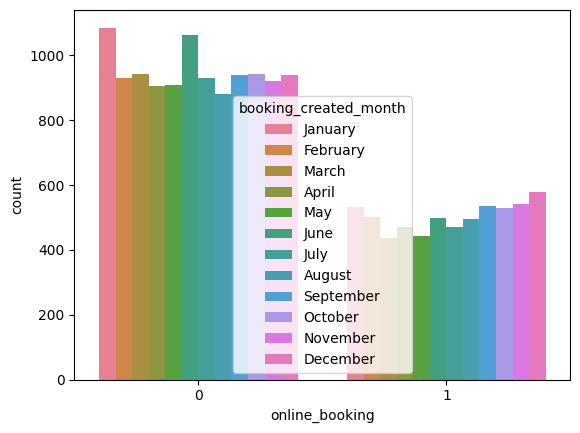

In [ ]:
sns.countplot(x='online_booking',hue='booking_created_month',data=data)

<Axes: xlabel='booking_created_week', ylabel='count'>

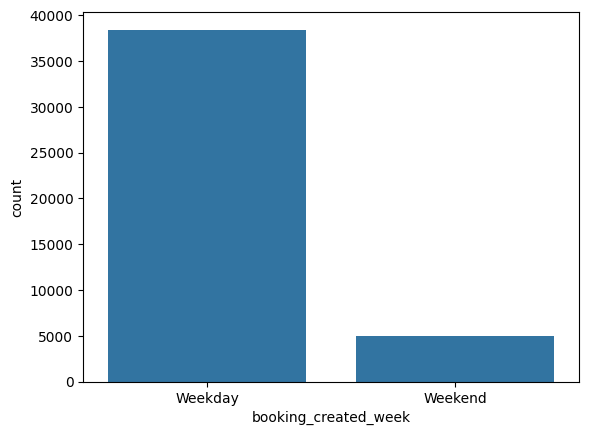

In [ ]:
sns.countplot(x='booking_created_week',data=data)

<Axes: xlabel='traveltype_hourly', ylabel='count'>

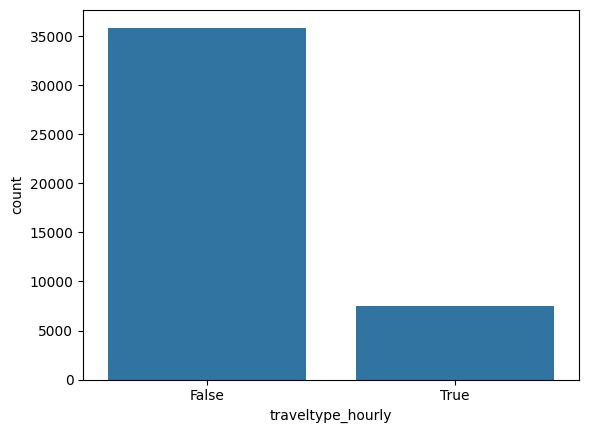

In [ ]:
sns.countplot(x='traveltype_hourly',data=data)

<Axes: xlabel='booking_created_session', ylabel='count'>

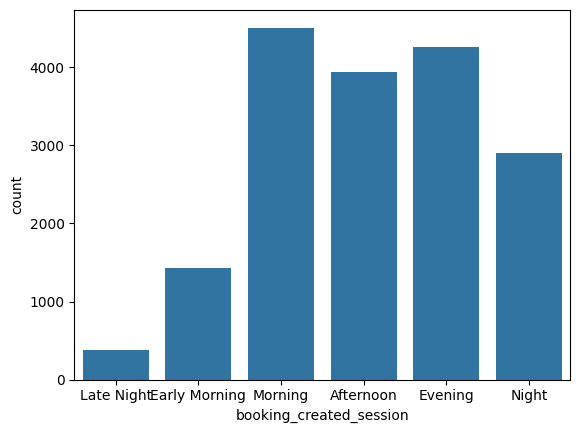

In [ ]:
sns.countplot(x='booking_created_session',data=data)

In [ ]:
data['from_area_id'].value_counts()

,count
from_area_id,
Low Cancellation,43415
Medium Cancellation,11
High Cancellation,5


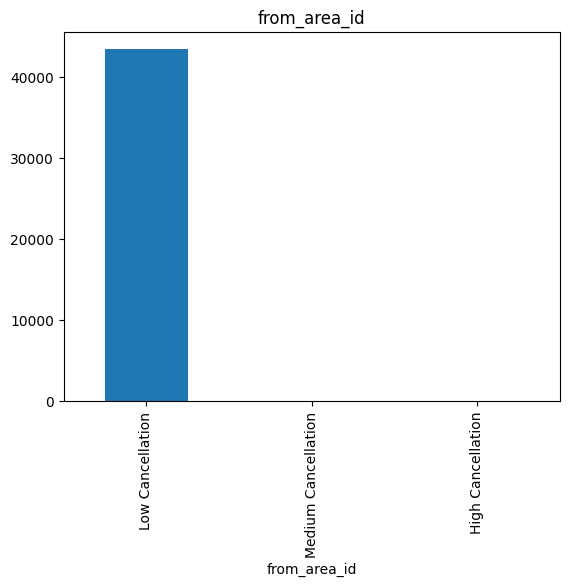

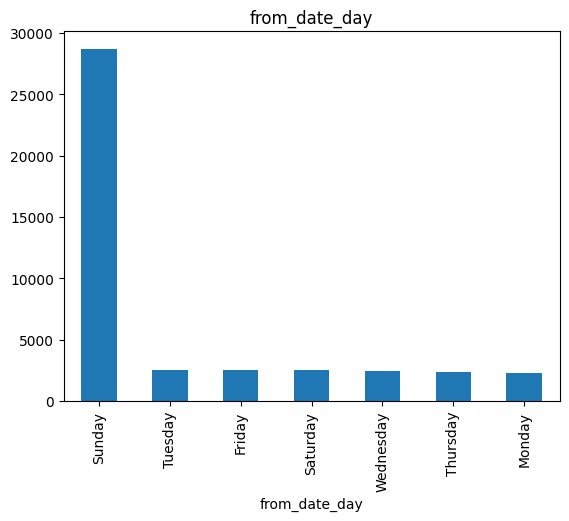

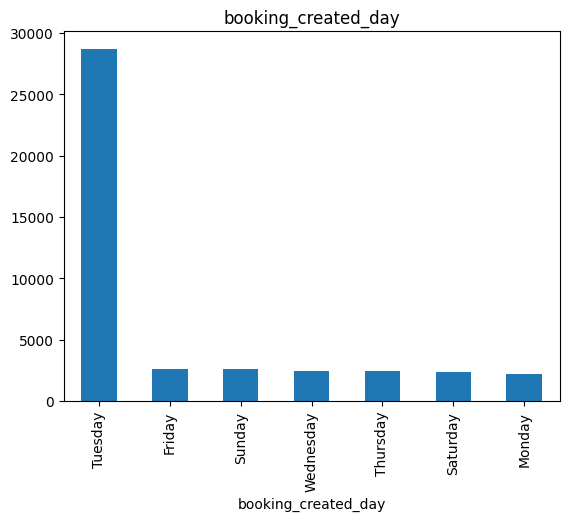

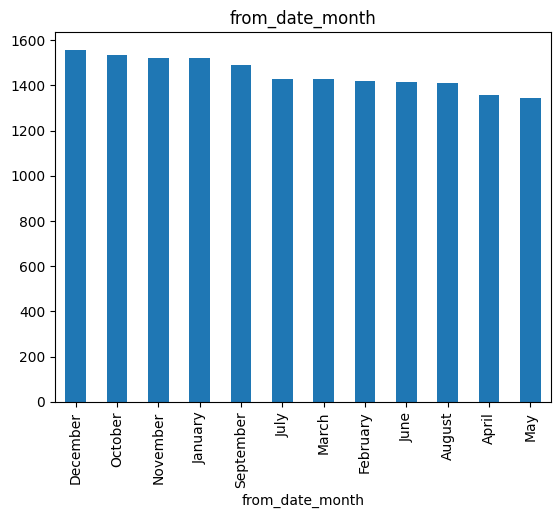

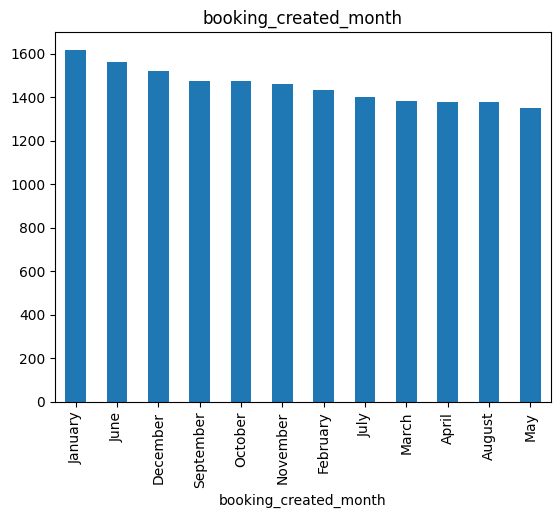

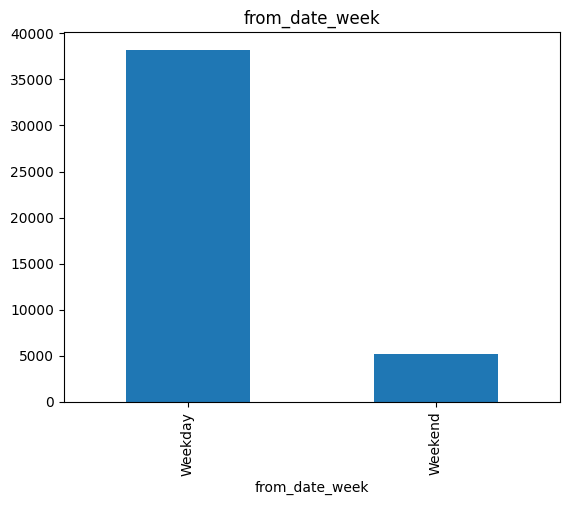

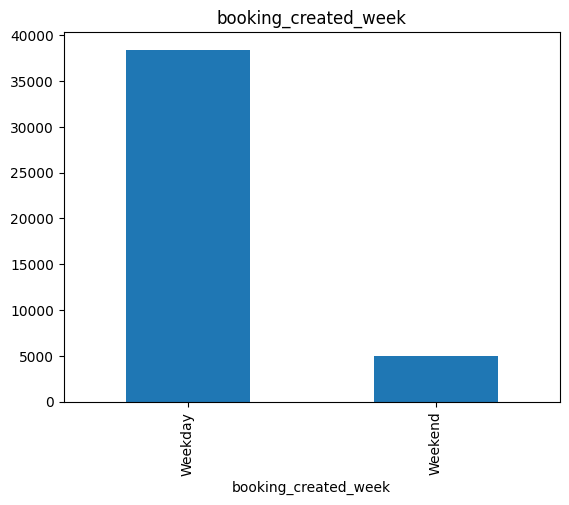

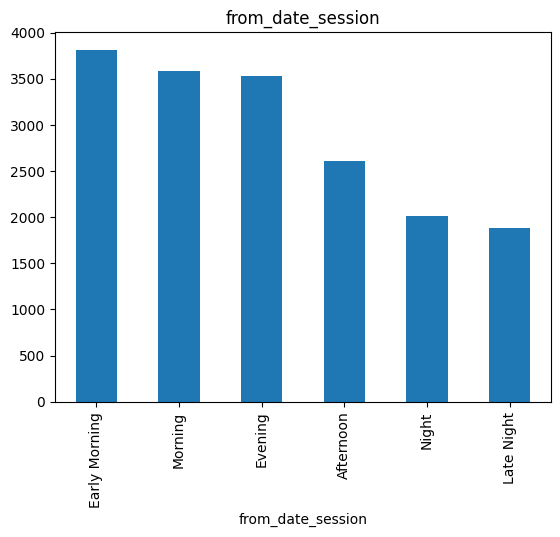

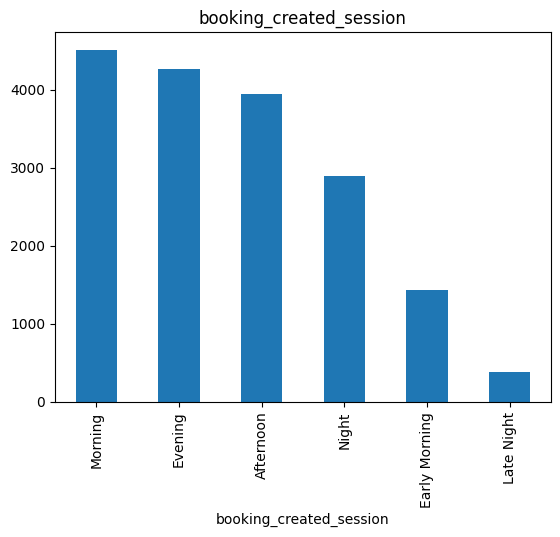

In [ ]:
for col in data.columns:
  if data[col].dtype == 'object':
    data[col].value_counts().plot.bar()
    plt.title(col)
    plt.show()

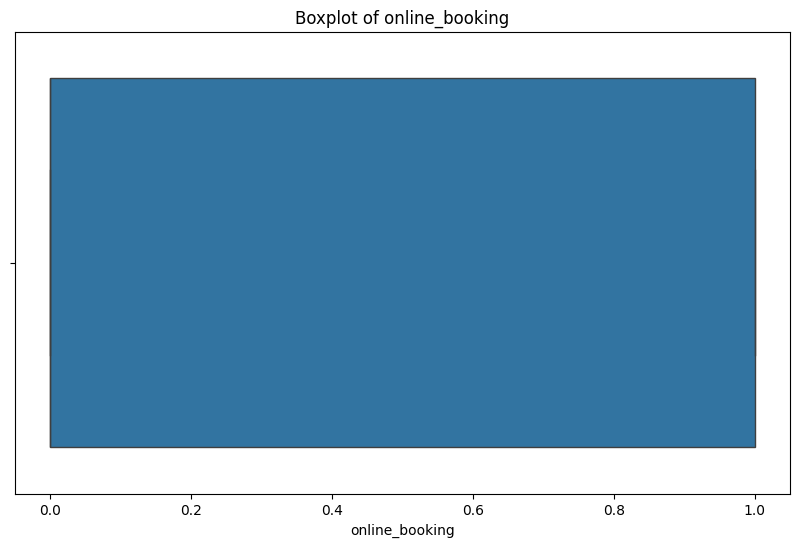

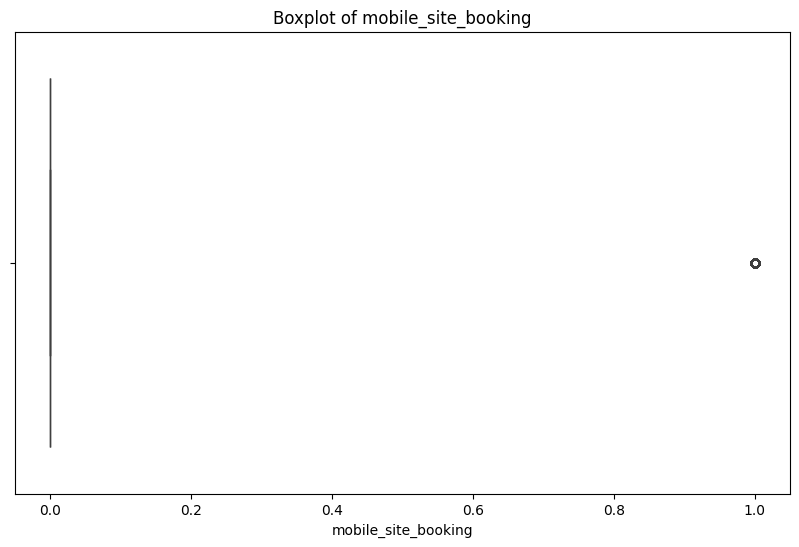

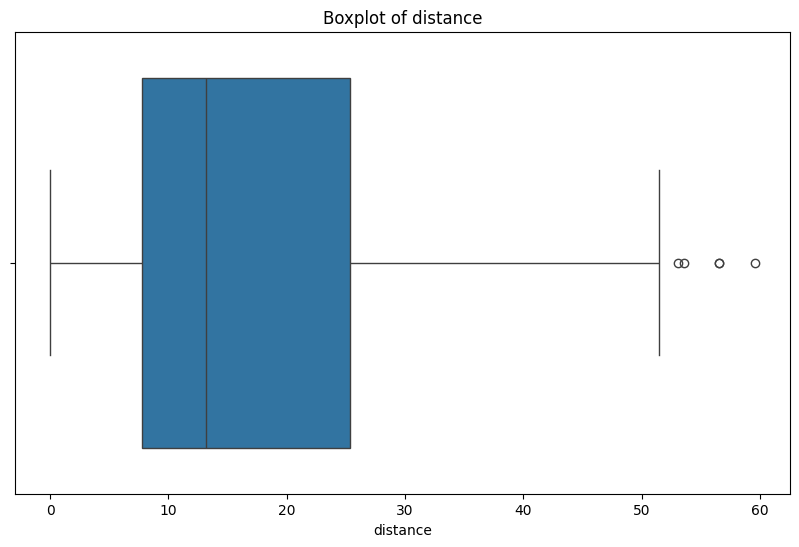

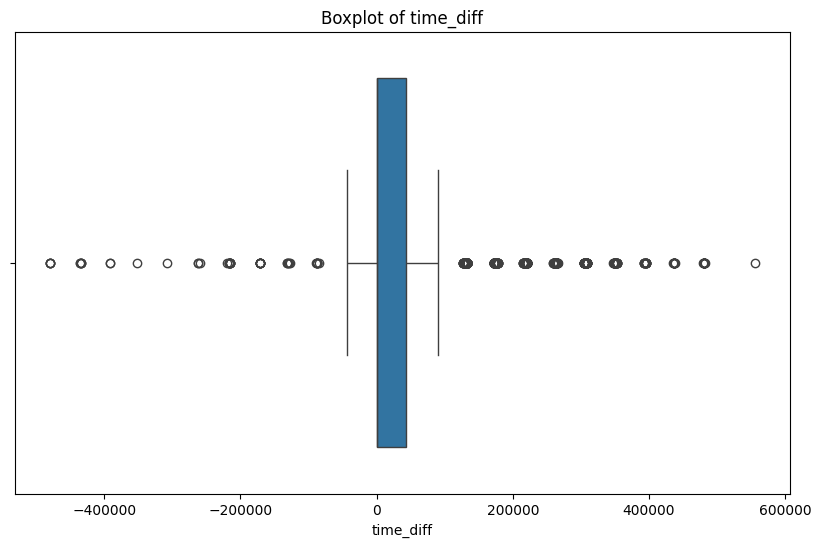

In [ ]:
for col in data.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [ ]:
# To Handle Outliers used capping method
for col in data.select_dtypes(include=np.number).columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    data[col] = np.where(
        data[col] > upper_limit,
        upper_limit,
        np.where(data[col] < lower_limit, lower_limit, data[col])
    )

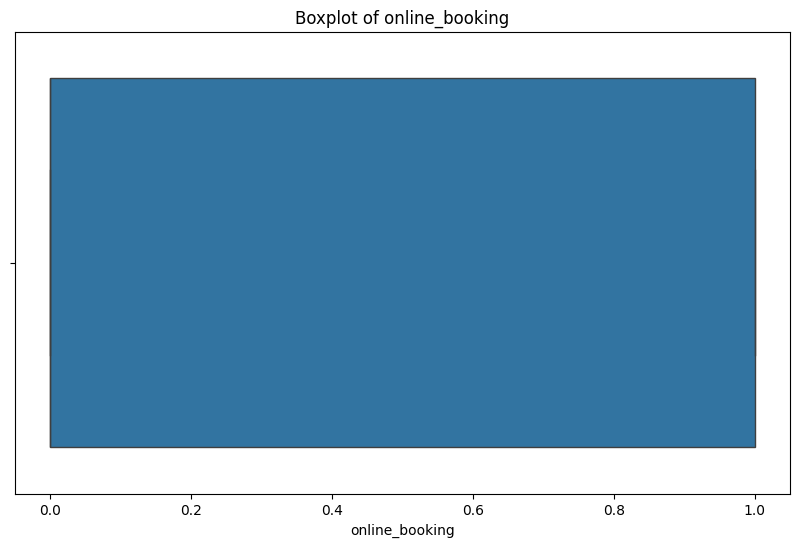

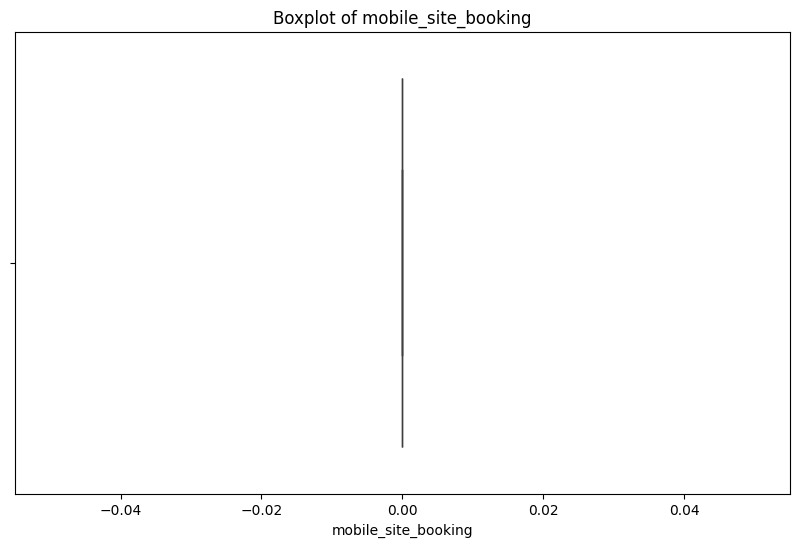

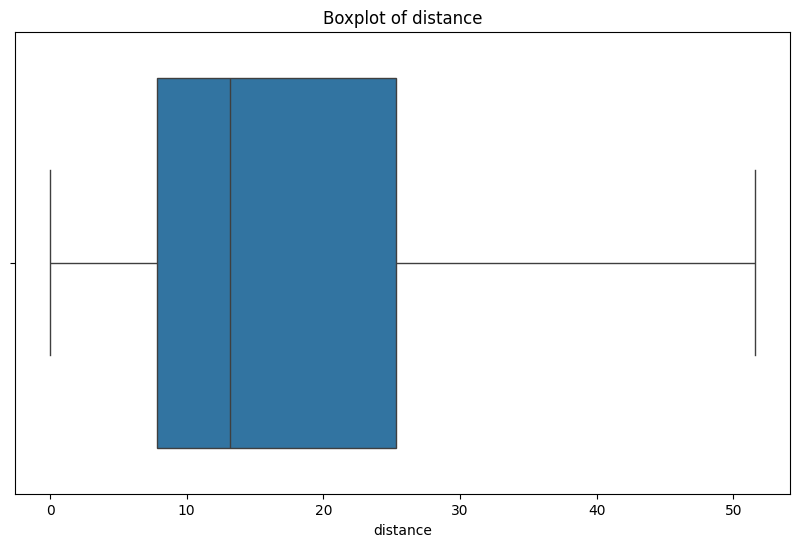

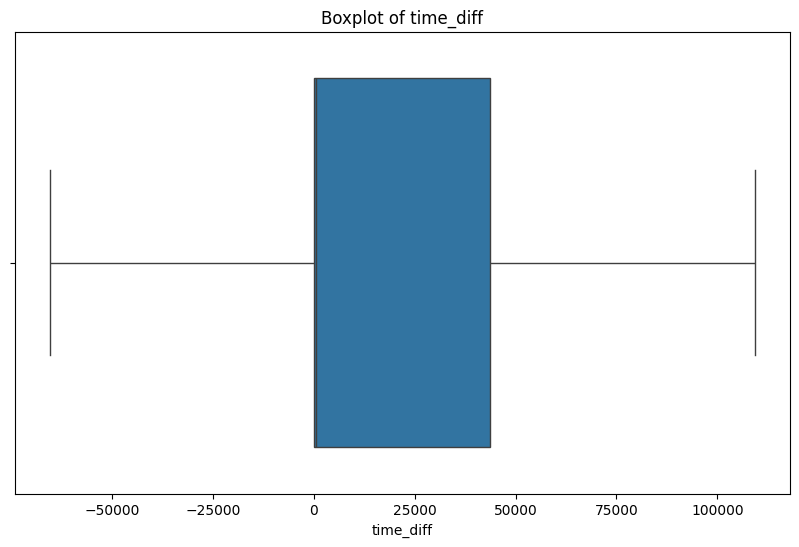

In [ ]:
for col in data.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [ ]:
data['traveltype_pointtopoint'] = data['traveltype_pointtopoint'].astype(int)
data['traveltype_hourly'] = data['traveltype_hourly'].astype(int)
data.head()

,from_area_id,online_booking,mobile_site_booking,traveltype_pointtopoint,traveltype_hourly,distance,from_date_day,booking_created_day,from_date_month,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,time_diff
0,Low Cancellation,0.0,0.0,1,0,3.980687,Tuesday,Tuesday,January,January,Weekday,Weekday,Late Night,Late Night,21.0
1,Low Cancellation,0.0,0.0,1,0,14.004432,Tuesday,Tuesday,January,January,Weekday,Weekday,Morning,Late Night,395.0
2,Low Cancellation,0.0,0.0,1,0,12.648909,Tuesday,Tuesday,January,January,Weekday,Weekday,Late Night,Late Night,22.0
3,Low Cancellation,0.0,0.0,1,0,9.534596,Tuesday,Tuesday,January,January,Weekday,Weekday,Early Morning,Late Night,66.0
4,Low Cancellation,0.0,0.0,1,0,14.655467,Tuesday,Tuesday,January,January,Weekday,Weekday,Morning,Early Morning,67.0


# Dividing data into Numerical and Categorical dataframes

In [ ]:
num = data.select_dtypes(include='number')
char = data.select_dtypes(include='object')

In [ ]:
num.head()

,online_booking,mobile_site_booking,traveltype_pointtopoint,traveltype_hourly,distance,time_diff
0,0.0,0.0,1,0,3.980687,21.0
1,0.0,0.0,1,0,14.004432,395.0
2,0.0,0.0,1,0,12.648909,22.0
3,0.0,0.0,1,0,9.534596,66.0
4,0.0,0.0,1,0,14.655467,67.0


In [ ]:
char.head()

,from_area_id,from_date_day,booking_created_day,from_date_month,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session
0,Low Cancellation,Tuesday,Tuesday,January,January,Weekday,Weekday,Late Night,Late Night
1,Low Cancellation,Tuesday,Tuesday,January,January,Weekday,Weekday,Morning,Late Night
2,Low Cancellation,Tuesday,Tuesday,January,January,Weekday,Weekday,Late Night,Late Night
3,Low Cancellation,Tuesday,Tuesday,January,January,Weekday,Weekday,Early Morning,Late Night
4,Low Cancellation,Tuesday,Tuesday,January,January,Weekday,Weekday,Morning,Early Morning


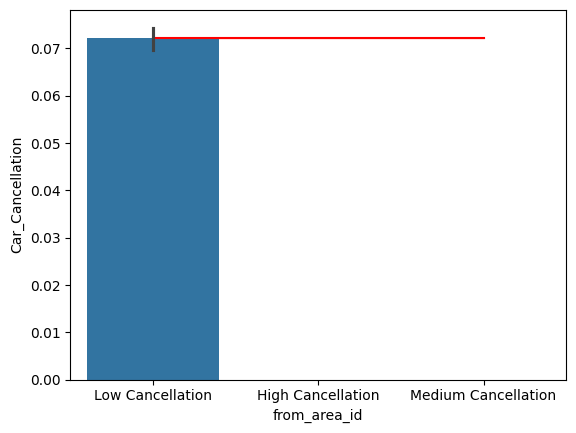

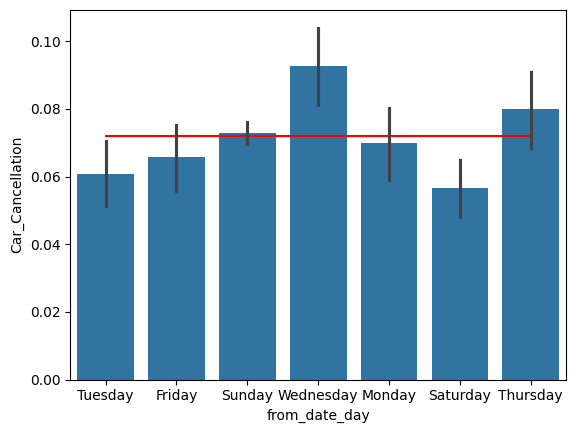

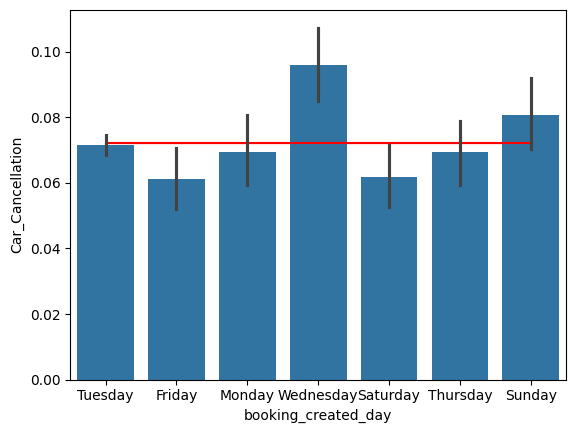

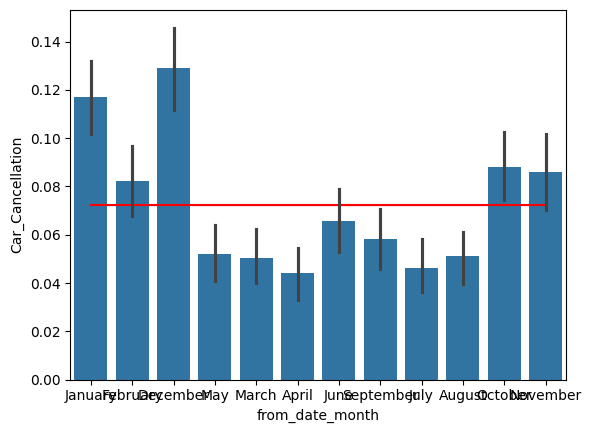

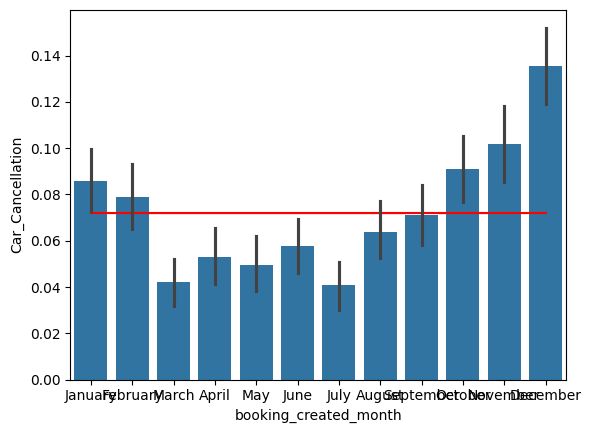

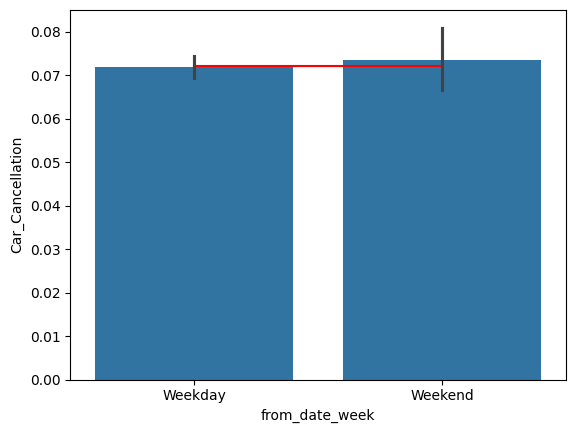

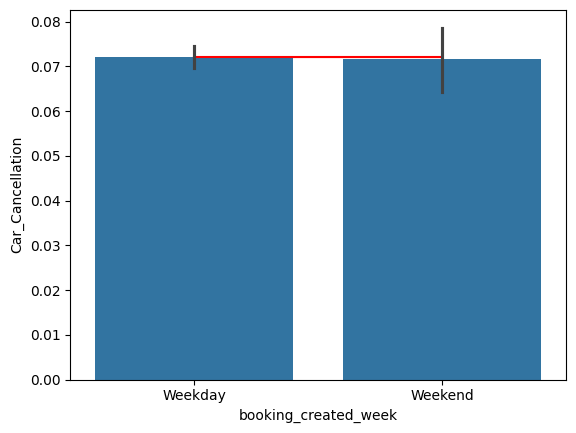

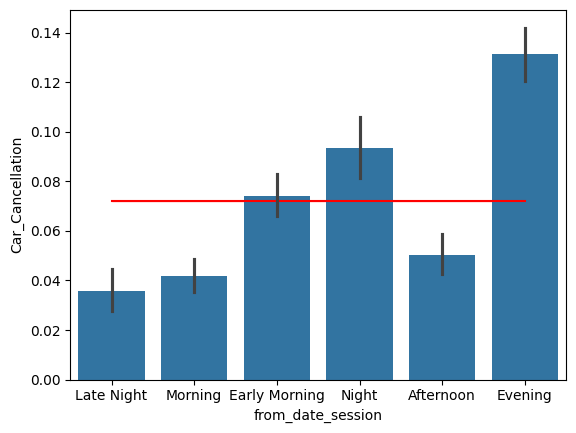

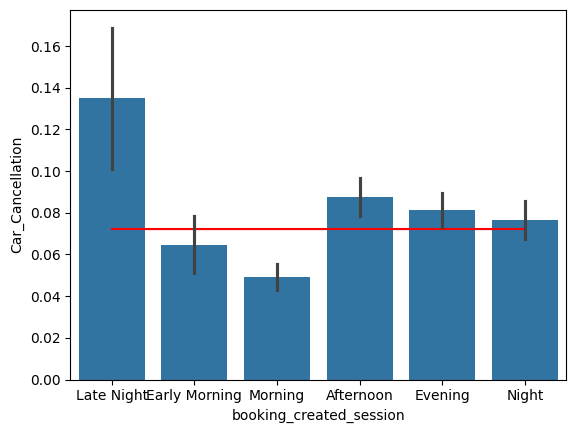

In [ ]:
X_char_merged = pd.concat([char,target],axis=1,join='inner')
from numpy import mean
for col in (char.columns):
  plt.figure
  sns.lineplot(x=col,y=X_char_merged['Car_Cancellation'].mean(),data=X_char_merged,
               estimator=mean,color='red')
  sns.barplot(x=col,y='Car_Cancellation',data=X_char_merged,estimator=mean)
  plt.show()

# Encoding Categorical Variables

In [ ]:
X_char_dum = pd.get_dummies(char,drop_first=True)
X_char_dum.shape

(43431, 48)

In [ ]:
X_char_dum.head()

,from_area_id_Low Cancellation,from_area_id_Medium Cancellation,from_date_day_Monday,from_date_day_Saturday,from_date_day_Sunday,from_date_day_Thursday,from_date_day_Tuesday,from_date_day_Wednesday,booking_created_day_Monday,booking_created_day_Saturday,...,from_date_session_Early Morning,from_date_session_Evening,from_date_session_Late Night,from_date_session_Morning,from_date_session_Night,booking_created_session_Early Morning,booking_created_session_Evening,booking_created_session_Late Night,booking_created_session_Morning,booking_created_session_Night
0,True,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
1,True,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
2,True,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
3,True,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,True,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,False,False


In [ ]:
data_all = pd.concat([num,X_char_dum],axis=1,join='inner')

In [ ]:
data_all.head()

,online_booking,mobile_site_booking,traveltype_pointtopoint,traveltype_hourly,distance,time_diff,from_area_id_Low Cancellation,from_area_id_Medium Cancellation,from_date_day_Monday,from_date_day_Saturday,...,from_date_session_Early Morning,from_date_session_Evening,from_date_session_Late Night,from_date_session_Morning,from_date_session_Night,booking_created_session_Early Morning,booking_created_session_Evening,booking_created_session_Late Night,booking_created_session_Morning,booking_created_session_Night
0,0.0,0.0,1,0,3.980687,21.0,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
1,0.0,0.0,1,0,14.004432,395.0,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
2,0.0,0.0,1,0,12.648909,22.0,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
3,0.0,0.0,1,0,9.534596,66.0,True,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,0.0,0.0,1,0,14.655467,67.0,True,False,False,False,...,False,False,False,True,False,True,False,False,False,False


In [ ]:
data_all.shape

(43431, 54)

In [ ]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 54 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   online_booking                         43431 non-null  float64
 1   mobile_site_booking                    43431 non-null  float64
 2   traveltype_pointtopoint                43431 non-null  int64  
 3   traveltype_hourly                      43431 non-null  int64  
 4   distance                               43431 non-null  float64
 5   time_diff                              15786 non-null  float64
 6   from_area_id_Low Cancellation          43431 non-null  bool   
 7   from_area_id_Medium Cancellation       43431 non-null  bool   
 8   from_date_day_Monday                   43431 non-null  bool   
 9   from_date_day_Saturday                 43431 non-null  bool   
 10  from_date_day_Sunday                   43431 non-null  bool   
 11  fr

In [ ]:
data_all['time_diff'].mean()
data_all['time_diff'].median()

592.0

In [ ]:
data_all['time_diff'].fillna(data_all['time_diff'].median(),inplace=True)

In [ ]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 54 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   online_booking                         43431 non-null  float64
 1   mobile_site_booking                    43431 non-null  float64
 2   traveltype_pointtopoint                43431 non-null  int64  
 3   traveltype_hourly                      43431 non-null  int64  
 4   distance                               43431 non-null  float64
 5   time_diff                              43431 non-null  float64
 6   from_area_id_Low Cancellation          43431 non-null  bool   
 7   from_area_id_Medium Cancellation       43431 non-null  bool   
 8   from_date_day_Monday                   43431 non-null  bool   
 9   from_date_day_Saturday                 43431 non-null  bool   
 10  from_date_day_Sunday                   43431 non-null  bool   
 11  fr

In [ ]:
target.value_counts()

,count
Car_Cancellation,
0,40299
1,3132


# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(data_all,target,test_size=0.2,random_state=42)

In [ ]:
# To Balance data using SMOTE Technique
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, Y_train_balanced = smote.fit_resample(X_train, Y_train)

In [ ]:
X_train_balanced.value_counts()
Y_train_balanced.value_counts()

,count
Car_Cancellation,
0,32247
1,32247


In [ ]:
X_train_balanced.head()

,online_booking,mobile_site_booking,traveltype_pointtopoint,traveltype_hourly,distance,time_diff,from_area_id_Low Cancellation,from_area_id_Medium Cancellation,from_date_day_Monday,from_date_day_Saturday,...,from_date_session_Early Morning,from_date_session_Evening,from_date_session_Late Night,from_date_session_Morning,from_date_session_Night,booking_created_session_Early Morning,booking_created_session_Evening,booking_created_session_Late Night,booking_created_session_Morning,booking_created_session_Night
0,0.0,0.0,1,0,38.270766,592.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1.0,0.0,1,0,26.893494,592.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.0,0.0,1,0,9.524376,592.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.0,0.0,1,0,18.040542,248.0,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0.0,0.0,1,0,7.249926,592.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
Y_train_balanced.head()

,Car_Cancellation
0,0
1,0
2,0
3,1
4,0


# Model Building

# 1.Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_balanced, Y_train_balanced)

X_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(Y_test, X_pred_lr)
conf = confusion_matrix(Y_test, X_pred_lr)
clf_report = classification_report(Y_test, X_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")


Accuracy Score of Logistic Regression is : 0.7243006791757799
Confusion Matrix : 
[[5948 2104]
 [ 291  344]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.95      0.74      0.83      8052
           1       0.14      0.54      0.22       635

    accuracy                           0.72      8687
   macro avg       0.55      0.64      0.53      8687
weighted avg       0.89      0.72      0.79      8687



In [ ]:
X_train_pred_lr = lr.predict(X_train_balanced)

In [ ]:
print(accuracy_score(X_train_pred_lr,Y_train_balanced))
print(accuracy_score(X_pred_lr,Y_test))

0.7205166372065619
0.7243006791757799


# 2. Decision Tree

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_balanced, Y_train_balanced)

X_pred_dtc = dtc.predict(X_test)
acc_dtc = accuracy_score(Y_test, X_pred_dtc)
conf = confusion_matrix(Y_test, X_pred_dtc)
clf_report = classification_report(Y_test, X_pred_dtc)

print(f"Accuracy Score of Decision Tree Classifier is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree Classifier is : 0.8503510993438471
Confusion Matrix : 
[[7166  886]
 [ 414  221]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      8052
           1       0.20      0.35      0.25       635

    accuracy                           0.85      8687
   macro avg       0.57      0.62      0.59      8687
weighted avg       0.89      0.85      0.87      8687



In [ ]:
X_train_pred = dtc.predict(X_train_balanced)

In [ ]:
print(accuracy_score(X_train_pred,Y_train_balanced))
print(accuracy_score(X_pred_dtc,Y_test))

0.9768040437870189
0.8503510993438471


# Overfitting Exist applying cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Assuming dtc is your trained Decision Tree Classifier
cv_scores_train = cross_val_score(dtc, X_train_balanced, Y_train_balanced, cv=5) # Using 5 folds for cross-validation
cv_scores_test = cross_val_score(dtc, X_test, Y_test, cv=5) # Using 5 folds for cross-validation


print("Cross-validation scores (Training):", cv_scores_train)
print("Mean cross-validation score (Training):", cv_scores_train.mean())
print("\nCross-validation scores (Testing):", cv_scores_test)
print("Mean cross-validation score (Testing):", cv_scores_test.mean())

Cross-validation scores (Training): [0.81246608 0.88115358 0.87642453 0.87727731 0.88486587]
Mean cross-validation score (Training): 0.8664374736936302

Cross-validation scores (Testing): [0.88837745 0.88952819 0.88428325 0.89637306 0.88716177]
Mean cross-validation score (Testing): 0.8891447431619268


# 3.Random Forest

In [ ]:
rd = RandomForestClassifier()
rd.fit(X_train_balanced, Y_train_balanced)
X_pred_rd = rd.predict(X_test)
acc_rd = accuracy_score(Y_test, X_pred_rd)
conf = confusion_matrix(Y_test, X_pred_rd)
clf_report = classification_report(Y_test,X_pred_rd)

print(f"Accuracy Score of Random Forest Classifier is : {acc_rd}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest Classifier is : 0.8646253021756648
Confusion Matrix : 
[[7291  761]
 [ 415  220]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      8052
           1       0.22      0.35      0.27       635

    accuracy                           0.86      8687
   macro avg       0.59      0.63      0.60      8687
weighted avg       0.89      0.86      0.88      8687



In [ ]:
X_train_pred_rd = rd.predict(X_train_balanced)
print(accuracy_score(X_train_pred_rd,Y_train_balanced))
print(accuracy_score(X_pred_rd,Y_test))

0.9766644959221013
0.8646253021756648


## Overfitting Exist so applying Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Assuming rd is your trained Random Forest Classifier
cv_scores_train_rf = cross_val_score(rd, X_train_balanced, Y_train_balanced, cv=5) # Using 5 folds for cross-validation
cv_scores_test_rf = cross_val_score(rd, X_test, Y_test, cv=5) # Using 5 folds for cross-validation

print("Cross-validation scores (Training - Random Forest):", cv_scores_train_rf)
print("Mean cross-validation score (Training - Random Forest):", cv_scores_train_rf.mean())
print("\nCross-validation scores (Testing - Random Forest):", cv_scores_test_rf)
print("Mean cross-validation score (Testing - Random Forest):", cv_scores_test_rf.mean())

Cross-validation scores (Training - Random Forest): [0.81479184 0.8961935  0.89045662 0.89340259 0.89641805]
Mean cross-validation score (Training - Random Forest): 0.8782525221807784

Cross-validation scores (Testing - Random Forest): [0.91254315 0.91311853 0.90846287 0.91652274 0.90903857]
Mean cross-validation score (Testing - Random Forest): 0.9119371719424189


# 4.Ada Boosting

In [ ]:
ada = AdaBoostClassifier(estimator=dtc)
ada.fit(X_train_balanced, Y_train_balanced)
X_pred_ada = ada.predict(X_test)
acc_ada = accuracy_score(Y_test, X_pred_ada)
conf = confusion_matrix(Y_test, X_pred_ada)
clf_report = classification_report(Y_test,X_pred_ada)

print(f"Accuracy Score of AdaBoost Classifier is : {acc_ada}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")


Accuracy Score of AdaBoost Classifier is : 0.8570277426038909
Confusion Matrix : 
[[7205  847]
 [ 395  240]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      8052
           1       0.22      0.38      0.28       635

    accuracy                           0.86      8687
   macro avg       0.58      0.64      0.60      8687
weighted avg       0.89      0.86      0.87      8687



In [ ]:
X_train_pred_ada = ada.predict(X_train_balanced)
print(accuracy_score(X_train_pred_ada,Y_train_balanced))
print(accuracy_score(X_pred_ada,Y_test))

0.9768040437870189
0.8570277426038909


# Overfiiting Exist So applying Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Assuming ada is your trained AdaBoost Classifier
cv_scores_train_ada = cross_val_score(ada, X_train_balanced, Y_train_balanced, cv=5) # Using 5 folds for cross-validation
cv_scores_test_ada = cross_val_score(ada, X_test, Y_test, cv=5) # Using 5 folds for cross-validation

print("Cross-validation scores (Training - AdaBoost):", cv_scores_train_ada)
print("Mean cross-validation score (Training - AdaBoost):", cv_scores_train_ada.mean())
print("\nCross-validation scores (Testing - AdaBoost):", cv_scores_test_ada)
print("Mean cross-validation score (Testing - AdaBoost):", cv_scores_test_ada.mean())

Cross-validation scores (Training - AdaBoost): [0.81812544 0.88906117 0.88363439 0.88851849 0.89122345]
Mean cross-validation score (Training - AdaBoost): 0.8741125858352662

Cross-validation scores (Testing - AdaBoost): [0.89700806 0.89240506 0.89752447 0.90788716 0.90443293]
Mean cross-validation score (Testing - AdaBoost): 0.899851535622507


# 5.Gradient Boosting

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train_balanced, Y_train_balanced)
X_pred_gb = gb.predict(X_test)
acc_gb = accuracy_score(Y_test, X_pred_gb)
conf = confusion_matrix(Y_test, X_pred_gb)
clf_report = classification_report(Y_test,X_pred_gb)

print(f"Accuracy Score of Gradient Boosting Classifier is : {acc_gb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Gradient Boosting Classifier is : 0.7453666398066076
Confusion Matrix : 
[[6104 1948]
 [ 264  371]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      8052
           1       0.16      0.58      0.25       635

    accuracy                           0.75      8687
   macro avg       0.56      0.67      0.55      8687
weighted avg       0.90      0.75      0.80      8687



In [ ]:
X_train_pred_gb = gb.predict(X_train_balanced)
print(accuracy_score(X_train_pred_gb,Y_train_balanced))
print(accuracy_score(X_pred_gb,Y_test))

0.7851272986634416
0.7453666398066076


# Evaluation of All Models

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting'],
    'Score': [acc_lr, acc_dtc, acc_rd, acc_ada, acc_gb]})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Random Forest,0.864625
3,AdaBoost,0.857028
1,Decision Tree,0.850351
4,Gradient Boosting,0.745367
0,Logistic Regression,0.724301


In [ ]:
# Create a dictionary to hold the scores
scores = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting'],
    'Testing Accuracy': [acc_lr, acc_dtc, acc_rd, acc_ada, acc_gb],
    'Mean CV Score (Training)': [None, cv_scores_train.mean(), cv_scores_train_rf.mean(), cv_scores_train_ada.mean(), None],
    'Mean CV Score (Testing)': [None, cv_scores_test.mean(), cv_scores_test_rf.mean(), cv_scores_test_ada.mean(), None]
}

# Create a DataFrame from the dictionary
scores_df = pd.DataFrame(scores)

# Display the DataFrame, sorting by Testing Accuracy
print("Model Performance Comparison:")
display(scores_df.sort_values(by='Testing Accuracy', ascending=False))

Model Performance Comparison:


,Model,Testing Accuracy,Mean CV Score (Training),Mean CV Score (Testing)
2,Random Forest,0.864625,0.878253,0.911937
3,AdaBoost,0.857028,0.874113,0.899852
1,Decision Tree,0.850351,0.866437,0.889145
4,Gradient Boosting,0.745367,NaN,NaN
0,Logistic Regression,0.724301,NaN,NaN


# Model Saving

In [ ]:
import joblib

# Save each trained model
joblib.dump(lr, 'logistic_regression_model.pkl')
joblib.dump(dtc, 'decision_tree_model.pkl')
joblib.dump(rd, 'random_forest_model.pkl')
joblib.dump(ada, 'adaboost_model.pkl')
joblib.dump(gb, 'gradient_boosting_model.pkl')

print("Models saved successfully!")

Models saved successfully!
